In [1]:
!pip install numpy pandas matplotlib plotly seaborn --quiet

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import opendatasets as od

%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
od.download('https://www.kaggle.com/competitions/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: glennmathews
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 69.9MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [5]:
os.listdir('rossmann-store-sales')

['test.csv', 'sample_submission.csv', 'store.csv', 'train.csv']

In [6]:
ross_df=pd.read_csv('./rossmann-store-sales/train.csv',low_memory=False)
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
store_df=pd.read_csv('./rossmann-store-sales/store.csv')
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [8]:
merged_df=ross_df.merge(store_df,how='left',on='Store')
print(merged_df.shape)
merged_df.head()

(1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
test_df=pd.read_csv("./rossmann-store-sales/test.csv")
merged_test_df=test_df.merge(store_df,how='left',on='Store')
print(merged_test_df.shape)
merged_test_df.head()

(41088, 17)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
round(merged_df.describe())

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1014567.0,693861.0,693861.0,1017209.0,509178.0,509178.0
mean,558.0,4.0,5774.0,633.0,1.0,0.0,0.0,5430.0,7.0,2009.0,1.0,23.0,2012.0
std,322.0,2.0,3850.0,464.0,0.0,0.0,0.0,7715.0,3.0,6.0,0.0,14.0,2.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,1900.0,0.0,1.0,2009.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0,710.0,4.0,2006.0,0.0,13.0,2011.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0,2330.0,8.0,2010.0,1.0,22.0,2012.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0,6890.0,10.0,2013.0,1.0,37.0,2013.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0,75860.0,12.0,2015.0,1.0,50.0,2015.0


In [12]:
merged_df.duplicated().sum()  #checking whether there are duplicate rows/data

0

In [13]:
merged_df['Date']=pd.to_datetime(merged_df.Date)
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)
print(merged_df.Date.min(),merged_df.Date.max())
merged_test_df.Date.min(),merged_test_df.Date.max()

2013-01-01 00:00:00 2015-07-31 00:00:00


(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

<Axes: xlabel='Sales', ylabel='Count'>

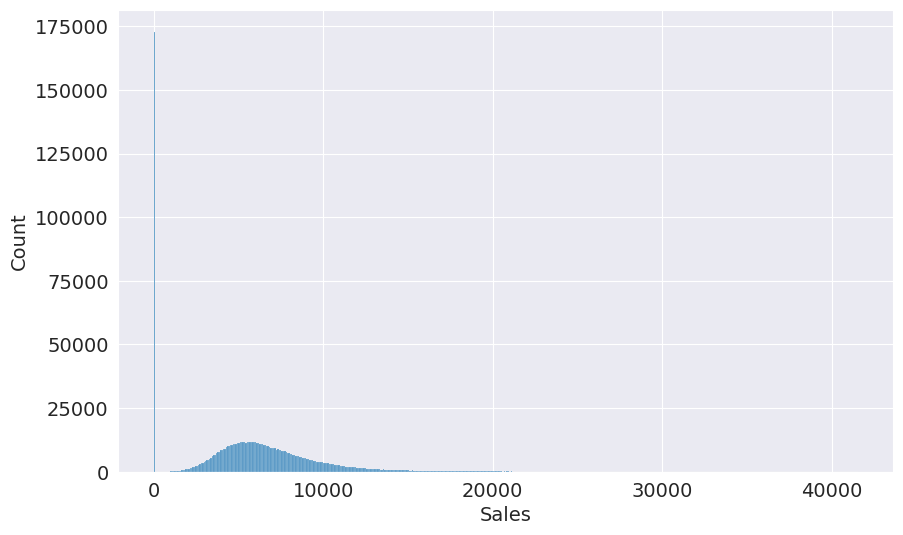

In [14]:
sns.histplot(data=merged_df,x='Sales')

In [15]:
print(merged_df.Open.value_counts())
merged_df[merged_df.Sales==0].Sales.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64


,count
Sales,
0,172871


<Axes: xlabel='Sales', ylabel='Count'>

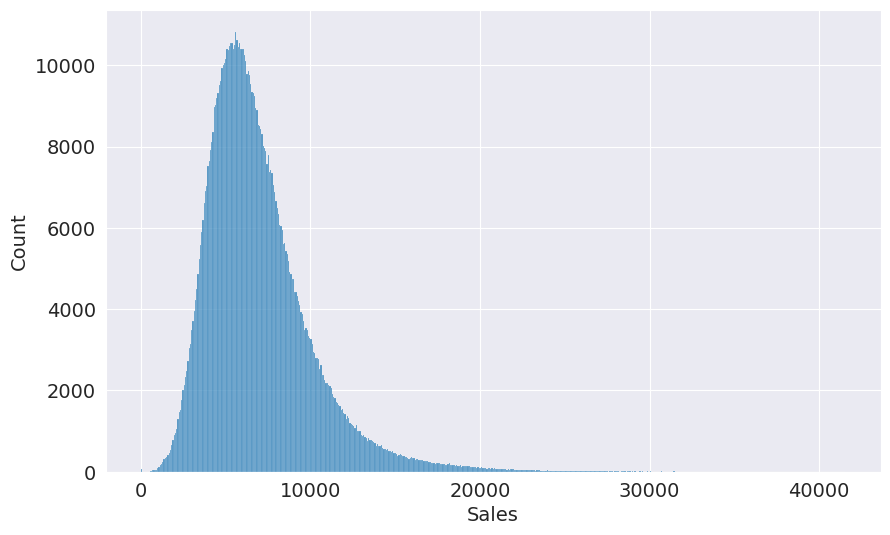

In [16]:
merged_df=merged_df[merged_df.Open==1].copy()        #only taking the open cases as if the store is closed then 100% the sales will be 0.
sns.histplot(data=merged_df,x='Sales')

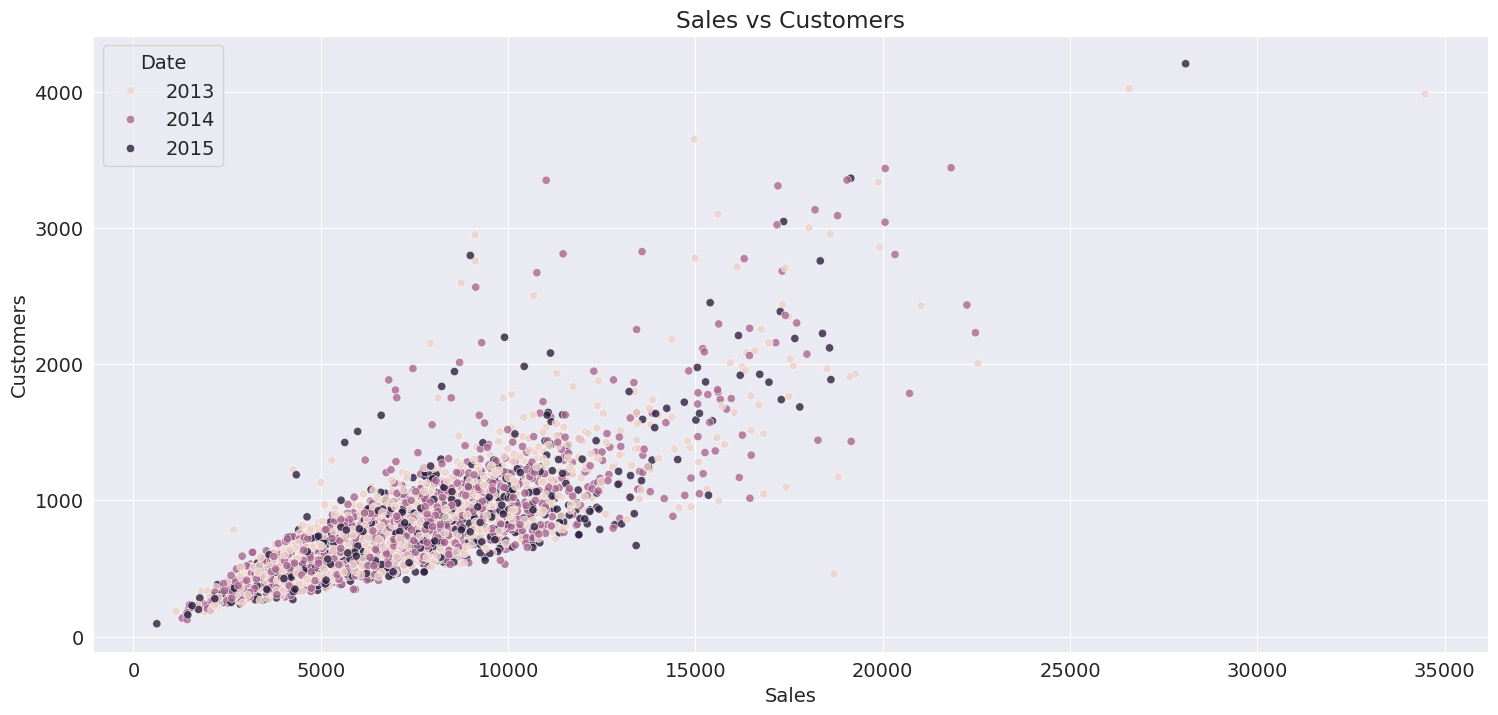

In [17]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(4000)
sns.scatterplot(x=temp_df.Sales,y=temp_df.Customers,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title("Sales vs Customers")
plt.show()

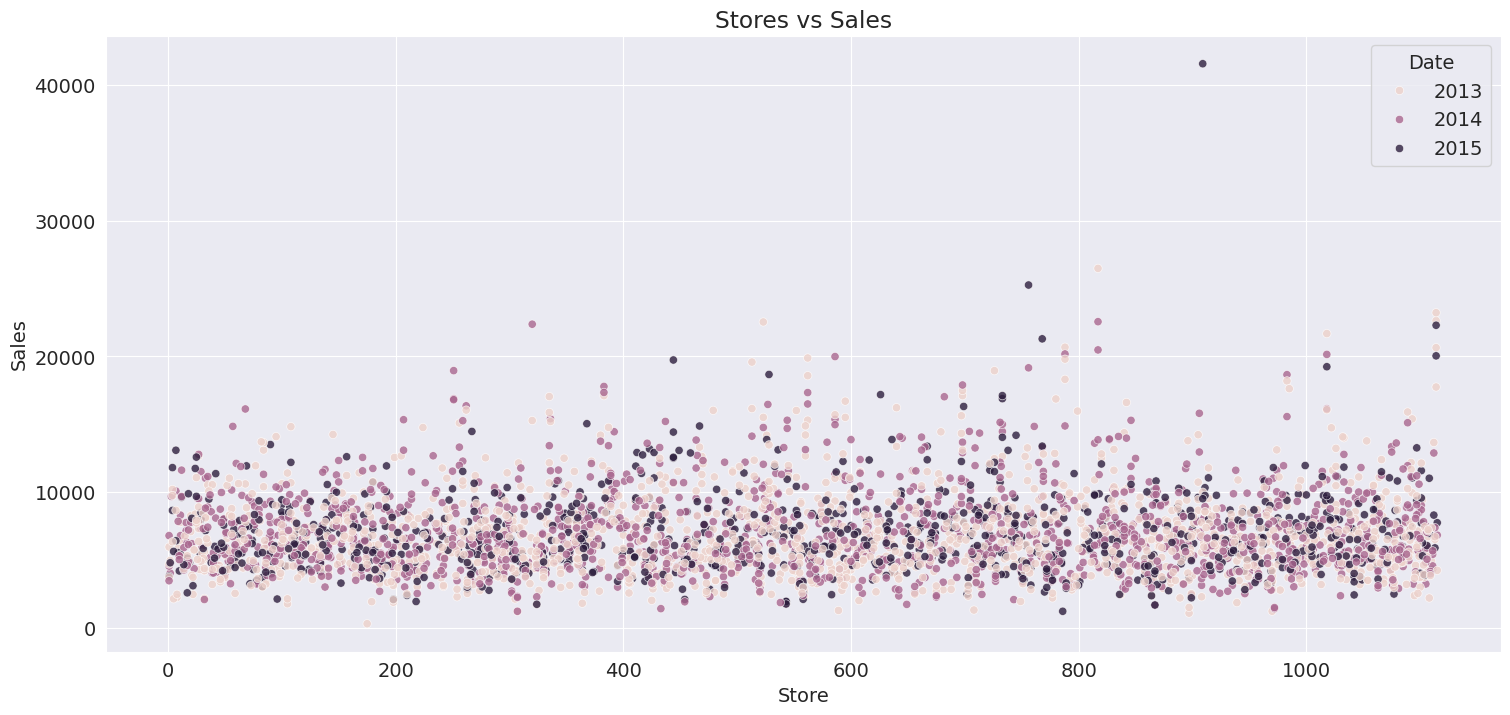

In [18]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(4000)
sns.scatterplot(x=temp_df.Store,y=temp_df.Sales,hue=temp_df.Date.dt.year,alpha=0.8)
plt.title("Stores vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

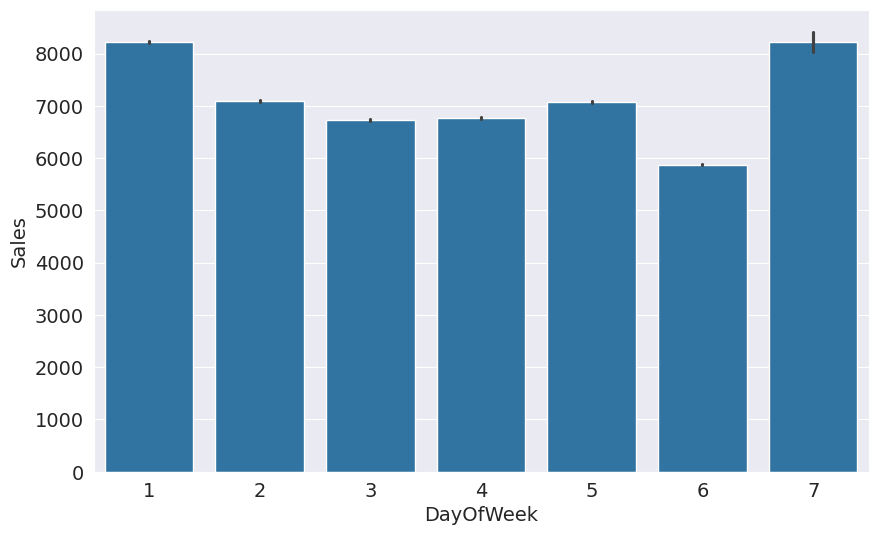

In [19]:
sns.barplot(data=merged_df,x='DayOfWeek',y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

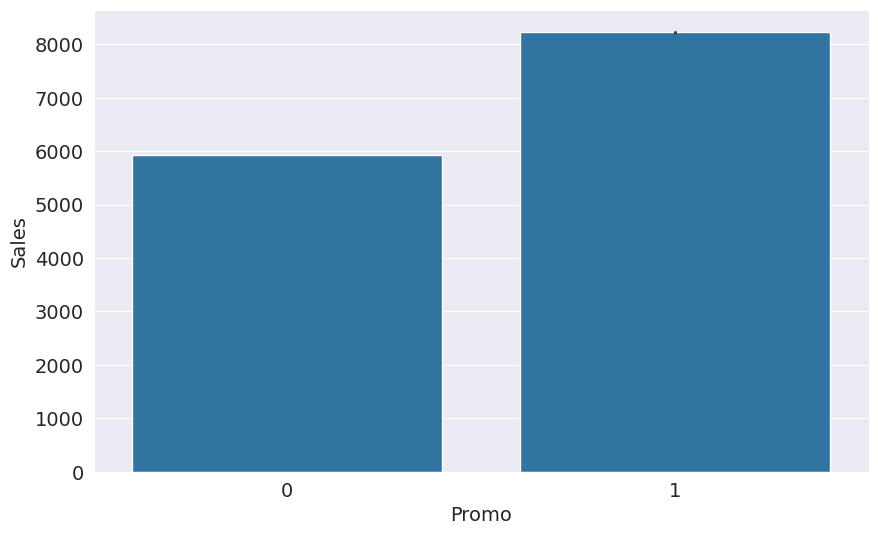

In [ ]:
sns.barplot(data=merged_df,x='Promo',y='Sales')

In [20]:
merged_df.Sales.corr(merged_df.DayOfWeek)

-0.17873635771604585

<Axes: xlabel='Year', ylabel='Sales'>

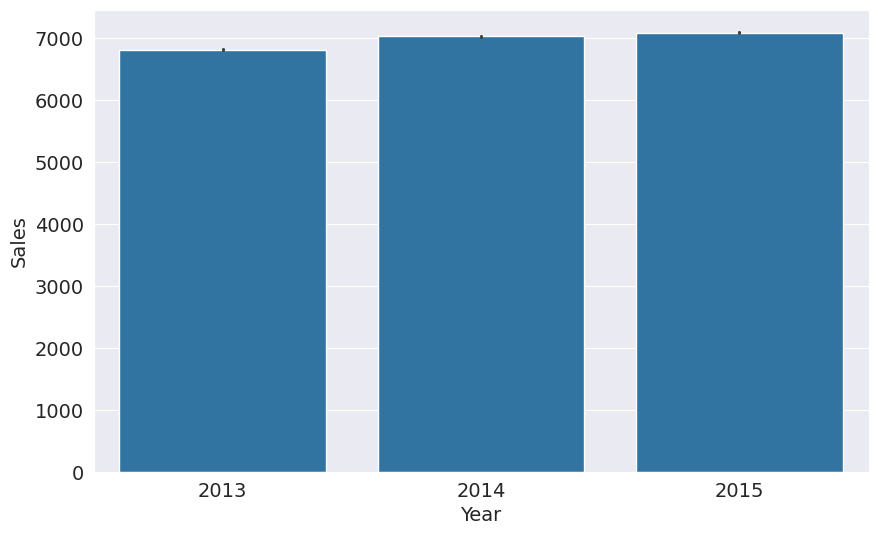

In [21]:
merged_df["Day"]=merged_df.Date.dt.day
merged_df["Month"]=merged_df.Date.dt.month              #some feature engineering
merged_df["Year"]=merged_df.Date.dt.year
merged_test_df["Day"]=merged_test_df.Date.dt.day
merged_test_df["Month"]=merged_test_df.Date.dt.month
merged_test_df["Year"]=merged_test_df.Date.dt.year
sns.barplot(data=merged_df,x='Year',y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

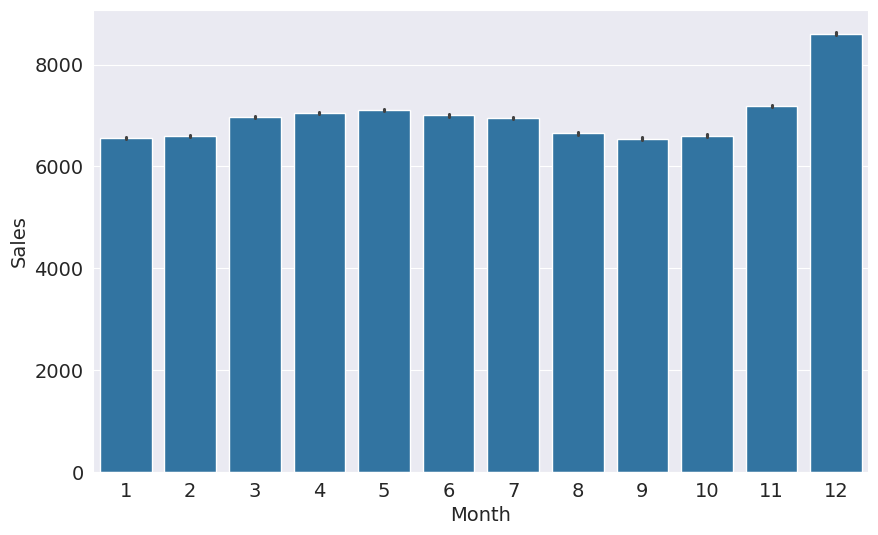

In [ ]:
sns.barplot(data=merged_df,x='Month',y='Sales')

<Axes: xlabel='Day', ylabel='Sales'>

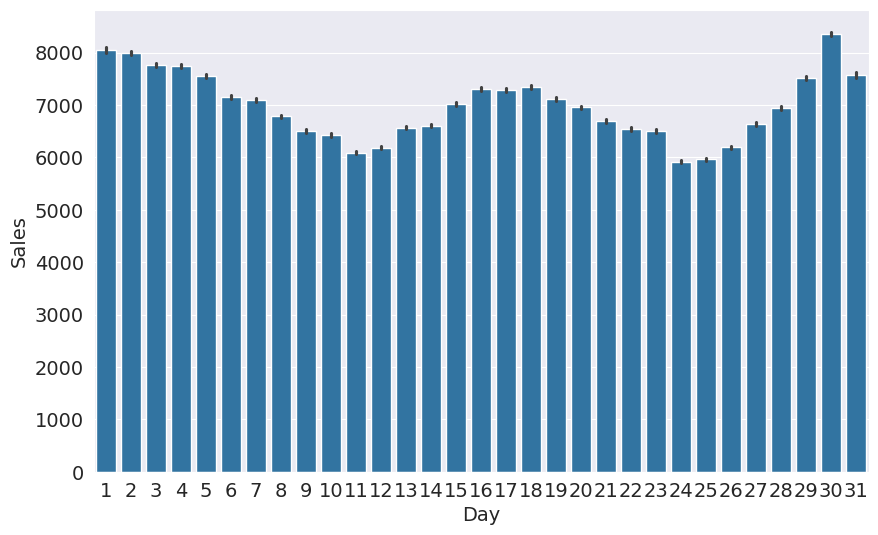

In [ ]:
sns.barplot(data=merged_df,x='Day',y='Sales')

In [22]:
train_size=int(0.75*len(merged_df))
train_size

633294

In [23]:
sorted_df=merged_df.sort_values('Date')                               #splitting the dataset based on the date
train_df,val_df=sorted_df[:train_size],sorted_df[train_size:]
len(train_df),len(val_df)

(633294, 211098)

In [24]:
print(train_df.Date.min(),train_df.Date.max())
val_df.Date.min(),val_df.Date.max()

2013-01-01 00:00:00 2014-12-10 00:00:00


(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [25]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_cols='Sales'
merged_df[input_cols].nunique()

,0
Store,1115
DayOfWeek,7
Promo,2
StateHoliday,4
StoreType,4
Assortment,3
Day,31
Month,12
Year,3


In [26]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_cols].copy()
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_cols].copy()
test_inputs=merged_test_df[input_cols].copy()

In [27]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

In [30]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]
x_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [31]:
from sklearn.metrics import mean_squared_error
def try_model(model):
  model.fit(x_train,train_targets)
  train_pred=model.predict(x_train)
  val_pred=model.predict(x_val)
  train_rmse=mean_squared_error(train_pred,train_targets,squared=False)
  val_rmse=mean_squared_error(val_pred,val_targets,squared=False)
  return train_rmse , val_rmse
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
print(try_model(LinearRegression()))
print(try_model(Ridge()))
print(try_model(Lasso()))
print(try_model(ElasticNet()))
print(try_model(SGDRegressor()))

(2741.5860353706703, 2817.656190781348)
(2741.5871950814444, 2817.7784665409868)
(2741.7143904640566, 2817.9472924045217)
(2879.0432103903954, 2972.6658860503385)
(2742.319204339256, 2828.432511320134)


(0.0, 1545.3003588353206)


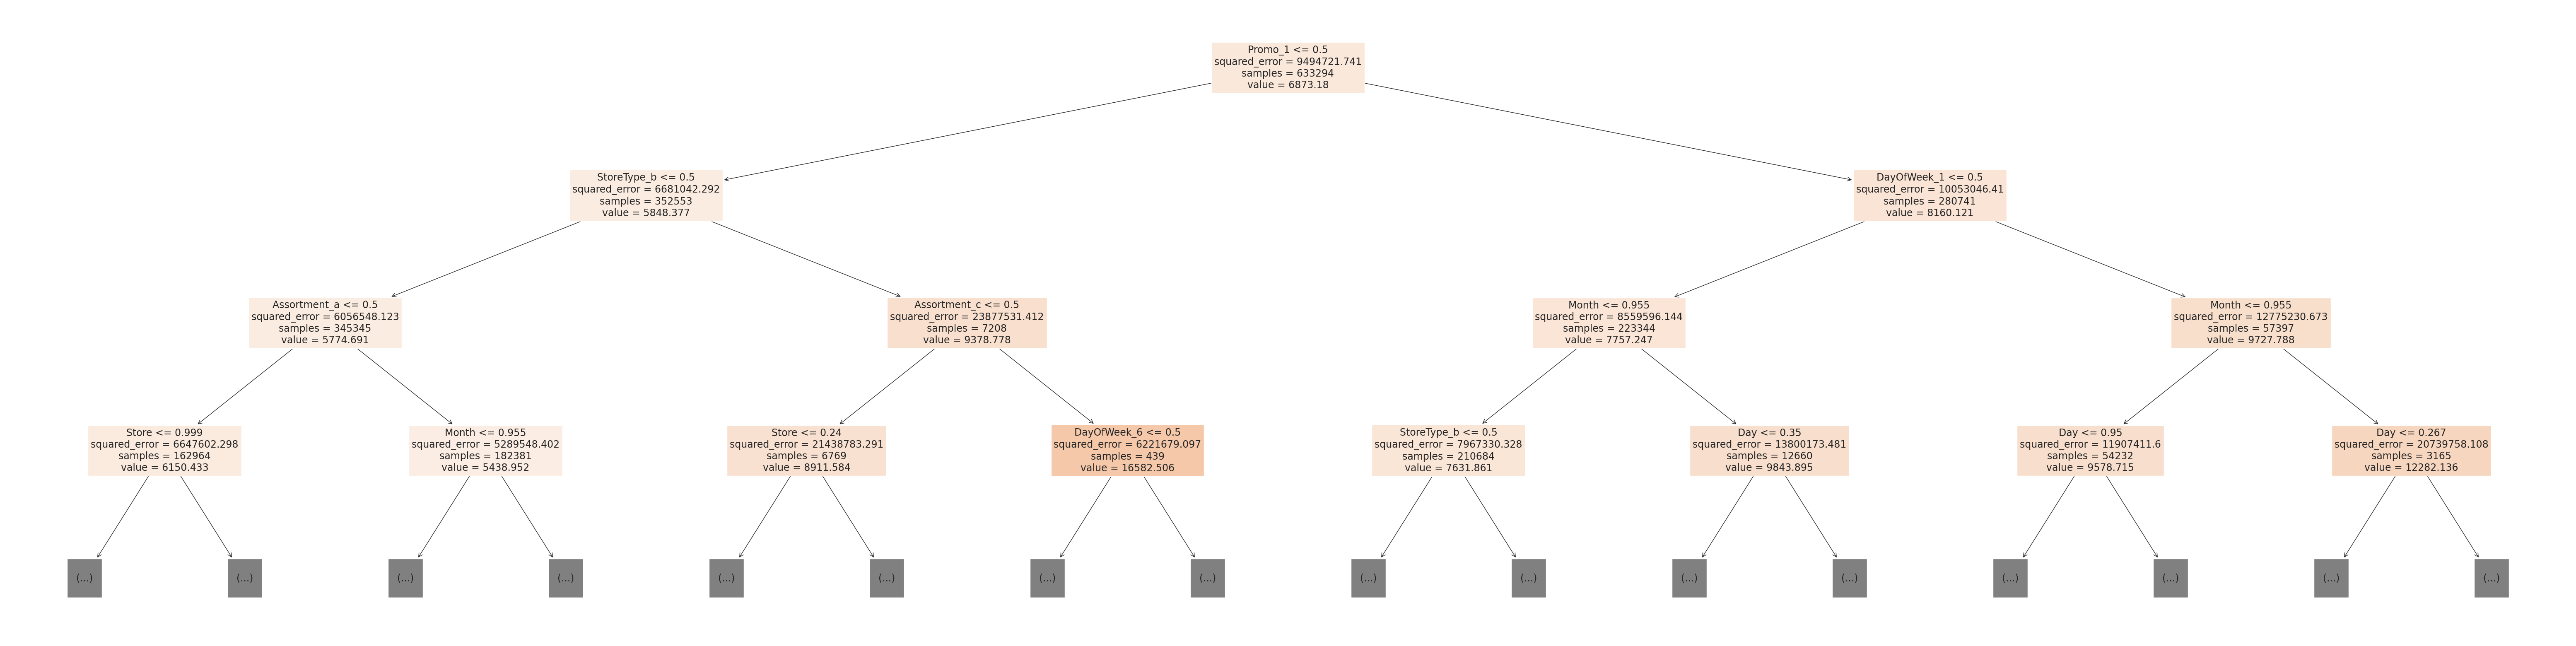

In [32]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
tree=DecisionTreeRegressor(random_state=7)
print(try_model(tree))
plt.figure(figsize=(80,20))
plot_tree(tree,max_depth=3,filled=True,feature_names=numeric_cols+encoded_cols);

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_jobs=-1,random_state=7)
try_model(rf)

(476.4120046585827, 1377.691897860466)

In [42]:
rf.feature_importances_

array([6.07928810e-01, 4.88946382e-02, 4.70244100e-02, 9.29523427e-03,
       3.37115283e-02, 4.37156917e-03, 2.45040688e-03, 2.10344284e-03,
       5.80570260e-03, 6.82363734e-03, 4.42943273e-03, 7.63343078e-02,
       6.25176849e-02, 1.18872551e-03, 2.17187732e-04, 2.31368802e-05,
       1.91768817e-05, 1.42662766e-02, 2.26117712e-02, 1.05712528e-02,
       1.29975790e-02, 8.79193131e-03, 5.42898085e-03, 1.21931765e-02])

In [44]:
importance_df=pd.DataFrame({'feature':numeric_cols+encoded_cols,'importance':rf.feature_importances_}).sort_values('importance',ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607929
11,Promo_0,0.076334
12,Promo_1,0.062518
1,Day,0.048895
2,Month,0.047024
4,DayOfWeek_1,0.033712
18,StoreType_b,0.022612
17,StoreType_a,0.014266
20,StoreType_d,0.012998
23,Assortment_c,0.012193


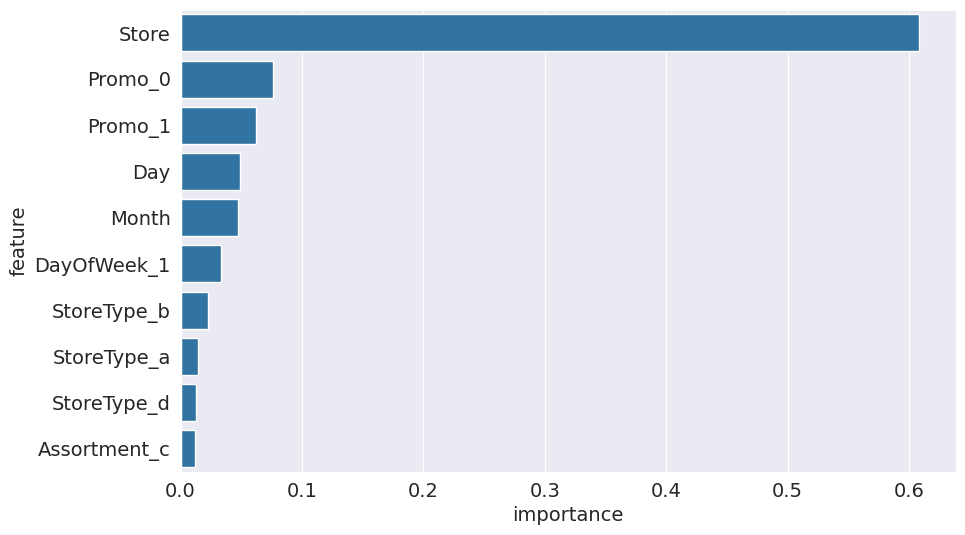

In [46]:
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

In [47]:
test_pred=rf.predict(x_test)
test_pred

array([ 4389.04,  7738.89,  8855.72, ...,  5893.47, 20454.25,  6773.68])

In [49]:
submission_df=pd.read_csv("./rossmann-store-sales/sample_submission.csv")
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [50]:
submission_df['Sales']=test_pred * test_df['Open'].astype('float')
submission_df.head()

,Id,Sales
0,1,4389.04
1,2,7738.89
2,3,8855.72
3,4,6779.72
4,5,6532.15


In [58]:
submission_df.fillna(0,inplace=True)
submission_df.to_csv('submission.csv',index=None)
!head submission.csv

Id,Sales
1,4389.04
2,7738.89
3,8855.72
4,6779.72
5,6532.15
6,5834.43
7,8106.45
8,8236.77
9,5991.82


This Submission csv file was then submitted to a kaggle competition.